# **CRIPTOATAQUES**

In [ ]:
import sys
import os

project_root = "/Criptoataques"

if project_root not in sys.path:
    sys.path.append(project_root)


import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
import string
AZ = list(string.ascii_uppercase)

mpl.rcParams['text.usetex'] = False

from crypto_io import ler_texto, inteiro_para_texto

from lib.ataques import cifra_de_Cesar as cesar

from lib.ataques.analise_de_frequencia import (
    contar_frequencias,
    frequencia_relativa,
)

from lib.ataques.cifra_de_vigenere.vigenere import VigenereCifra

vigenere = VigenereCifra()
encriptar_decriptar = vigenere.encriptar_decriptar

from lib.ataques.cifra_de_vigenere import ataque as vigenere_ataq

from lib.ataques.rsa_franklin_reiter import (
    ataque_franklin_reiter,
    gerador_caso_relacionado_linear,
)   

from lib.estatisticas import (
    medir_tempo,
    expansao_tamanho,
    calcular_avalanche,
    comparar_algoritmos,
    indice_coincidencia,
    tamanho_bytes,
    matriz_original_vs_cifrada,  
)


base_path = "examples/textos_base"
arquivos = sorted(f for f in os.listdir(base_path) if f.endswith(".txt"))

textos = {
    os.path.splitext(arquivo)[0].capitalize(): 
    ler_texto(os.path.join(base_path, arquivo))
    for arquivo in arquivos
}


## **Análise Estatística dos Textos Originais**

Antes de aplicar os algoritmos de criptografia, é fundamental entender as características estatísticas dos textos originais . Essa análise nos fornecerá uma base para comparar o impacto dos algoritmos nas propriedades dos dados.

### **Métricas Estatísticas e Comparativos Iniciais**

Nesta seção, serão apresentadas e comparadas as análises estatísticas para os textos de diferentes extensões.

In [ ]:
def plot_freq(texto, titulo, ax):
    freqs = frequencia_relativa(contar_frequencias(texto))

    letras = list(freqs.keys())
    valores = list(freqs.values())

    # Gráfico
    ax.bar(letras, valores)
    ax.set_title(titulo)
    ax.set_xlabel("Caracteres")
    ax.set_ylabel("Frequência relativa")
    ax.set_ylim(0, max(valores) * 1.2)

def tabela_metricas(textos_dict):
    """
    Retorna um pandas.DataFrame com:
    - Índice de Coincidência
    - Total de caracteres
    - Caracteres distintos
    """

    dados = []

    for nome, texto in textos_dict.items():
        freq_abs = contar_frequencias(texto)
        dados.append({
            "Texto": nome,
            "Índice de Coincidência": indice_coincidencia(texto),
            "Total de caracteres": len(texto),
            "Caracteres distintos": len(freq_abs)
        })

    tabela_df = pd.DataFrame(dados)
    tabela_df.set_index("Texto", inplace=True)

    return tabela_df

def plot_tabela_metricas(df, title="Métricas dos Textos"):
    """
    Plota bonitamente um DataFrame como tabela em matplotlib.
    """
    fig, ax = plt.subplots(figsize=(10, 1 + 0.4 * len(df)))

    ax.axis("off")
    tabela_plot = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        rowLabels=df.index,
        loc="center",
        cellLoc="center"
    )

    tabela_plot.auto_set_font_size(False)
    tabela_plot.set_fontsize(11)
    tabela_plot.scale(1, 1.3)

    plt.title(title, fontsize=14, pad=20)
    plt.show()

metricas = tabela_metricas(textos)
metricas

NameError: name 'textos_dict' is not defined

bla bla bla

Segue os gráficos individuais de frequência:

In [8]:
def plot_freqs_multiplos(textos):
    import math
    
    n = len(textos)
    cols = 2
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axs = axs.flatten()

    for ax, (nome, texto) in zip(axs, textos.items()):
        plot_freq(texto, f"Texto {nome}", ax=ax)

    # Apaga slots vazios
    for ax in axs[len(textos):]:
        ax.remove()

    plt.tight_layout()
    plt.show()
    



In [10]:
def plot_freqs_linha(textos_dict, titulo="Comparação de Frequências Relativas"):
    plt.figure(figsize=(12, 5))

    # 1) descobre o conjunto completo de caracteres usados
    todas_letras = sorted(
        set().union(*[contar_frequencias(t).keys() for t in textos_dict.values()])
    )

    # 2) plota cada texto como uma linha
    for nome, texto in textos_dict.items():
        freq = frequencia_relativa(contar_frequencias(texto))

        valores = [freq.get(l, 0) for l in todas_letras]

        plt.plot(todas_letras, valores, marker="o", linewidth=1.3, label=nome)

    plt.title(titulo)
    plt.xlabel("Caracteres")
    plt.ylabel("Frequência relativa")

    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


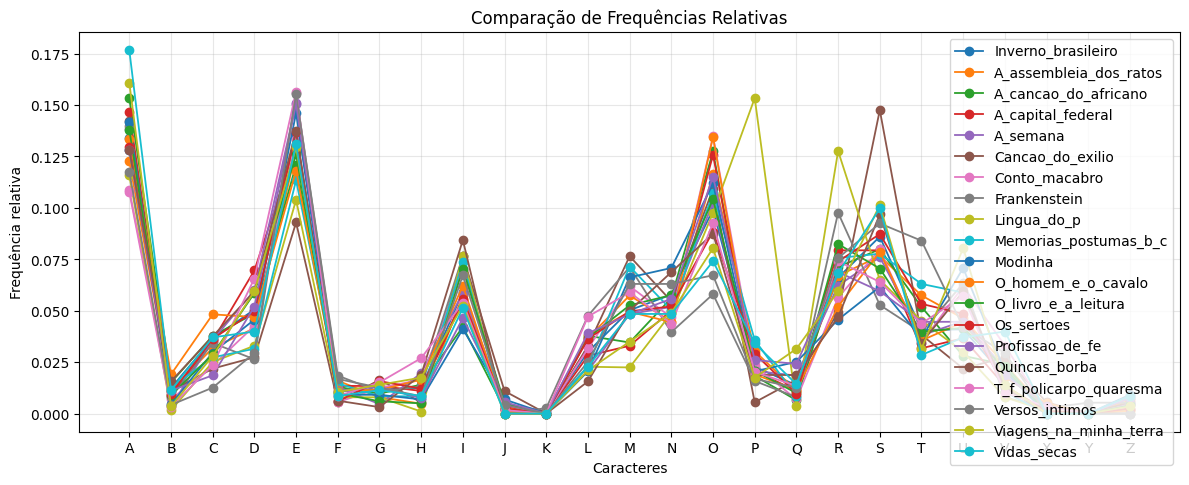

In [9]:
plot_freqs_linha(textos)

bla bla bla

## **Análise de Desempenho dos Algoritmos Criptográficos**

Para avaliar a eficácia e segurança dos algoritmos de criptografia, vamos analisar diversas métricas após a aplicação de cada algoritmo aos textos originais. Isso nos permitirá comparar o desempenho e as características dos textos cifrados e decifrados.

### **Métricas de Avaliação Detalhadas e Comparativos**

#### **Tempo de Criptografia/Descriptografia**

Esta métrica mede o tempo necessário para um algoritmo criptografar e descriptografar um determinado texto. É crucial para entender a eficiência operacional de cada algoritmo, especialmente em cenários de alta demanda ou com grandes volumes de dados. Um algoritmo mais rápido pode ser preferível, desde que não comprometa a segurança.

*   **Gráficos Comparativos:**

In [ ]:
def cesar_cifrar(texto):
    return cesar.cifrar(texto, chave=3)

def cesar_ataque(texto):
    return cesar.ataque_cesar(texto)

def cesar_decifrar(texto):
    return cesar.decifrar(texto,chave=3)



def vigenere_cifrar(texto):
    return encriptar_decriptar(texto, chave="cripto", opcao="cifrar")

def vigenere_ataque(texto):
    return vigenere_ataq.atacar(texto)

def vigenere_decifrar(texto_cifrado):
    return encriptar_decriptar(texto_cifrado, chave="cripto", opcao="decifrar")


# ----------------------------------------
# CONFIGURAÇÕES
# ----------------------------------------
BITS_PARA_TESTE = 2048
MAX_RSA_BYTES = BITS_PARA_TESTE // 8 - 1
E_PARA_TESTE    = 101


# ----------------------------------------
# RSA: CIFRAR
# ----------------------------------------
def rsa_cifrar(texto):
    """
    Gera um caso RSA relacionado (Franklin–Reiter) e devolve c1.
    O caso inteiro é salvo em rsa_cifrar.last_case.
    """

    texto_limitado = texto[:MAX_RSA_BYTES]

    if not texto_limitado:
        raise ValueError("Texto vazio após limitação de tamanho.")

    caso = gerador_caso_relacionado_linear(
        texto1=texto_limitado,
        bits=BITS_PARA_TESTE,
        e_inicial=E_PARA_TESTE
    )

    # Salva o caso para decifrar e atacar depois
    rsa_cifrar.last_case = caso

    # c1 é um inteiro → devolvemos string
    return str(caso["c1"])
    

# ----------------------------------------
# RSA: DECIFRAR
# ----------------------------------------
def rsa_decifrar(texto_cifrado):

    if not hasattr(rsa_cifrar, "last_case"):
        raise RuntimeError("RSA ainda não cifrou nenhum texto.")

    caso = rsa_cifrar.last_case

    c = int(texto_cifrado)
    d = caso["d"]
    n = caso["n"]
    nbytes = caso["nbytes"]

    m = pow(c, d, n)
    return inteiro_para_texto(m, nbytes)


# ----------------------------------------
# RSA: ATAQUE FRANKLIN–REITER
# (usa o MESMO caso do cifrar)
# ----------------------------------------
def ataque_rsa(texto_cifrado):

    if not hasattr(rsa_cifrar, "last_case"):
        raise RuntimeError("RSA ainda não cifrou nenhum texto (nenhum caso disponível).")

    caso = rsa_cifrar.last_case

    return ataque_franklin_reiter(
        caso["c1"],
        caso["c2"],
        caso["e"],
        caso["n"],
        caso["a"],
        caso["b"],
        caso["nbytes"],
        d=caso.get("d"),
    )


algoritmos_combinados = {
    "César": {
        "cifrar": cesar_cifrar,
        "decifrar": cesar_decifrar,
        "atacar": cesar_ataque
    },
     "Vigenere": {
        "cifrar": vigenere_cifrar,
        "decifrar": vigenere_decifrar,
        "atacar": vigenere_ataque
    },
    "RSA": {
        "cifrar": rsa_cifrar,
        "decifrar": rsa_decifrar,
        "atacar": ataque_rsa
    },
}


primeiros_5_itens = dict(list(textos.items())[:5])

comparacao = comparar_algoritmos(primeiros_5_itens, algoritmos_combinados)

processado: ('César', 'Inverno_brasileiro')
processado: ('César', 'A_assembleia_dos_ratos')
processado: ('César', 'A_cancao_do_africano')
processado: ('César', 'A_capital_federal')
processado: ('César', 'A_semana')
processado: ('Vigenere', 'Inverno_brasileiro')
processado: ('Vigenere', 'A_assembleia_dos_ratos')
processado: ('Vigenere', 'A_cancao_do_africano')
processado: ('Vigenere', 'A_capital_federal')
processado: ('Vigenere', 'A_semana')
processado: ('RSA', 'Inverno_brasileiro')
processado: ('RSA', 'A_assembleia_dos_ratos')
processado: ('RSA', 'A_cancao_do_africano')
processado: ('RSA', 'A_capital_federal')
processado: ('RSA', 'A_semana')


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


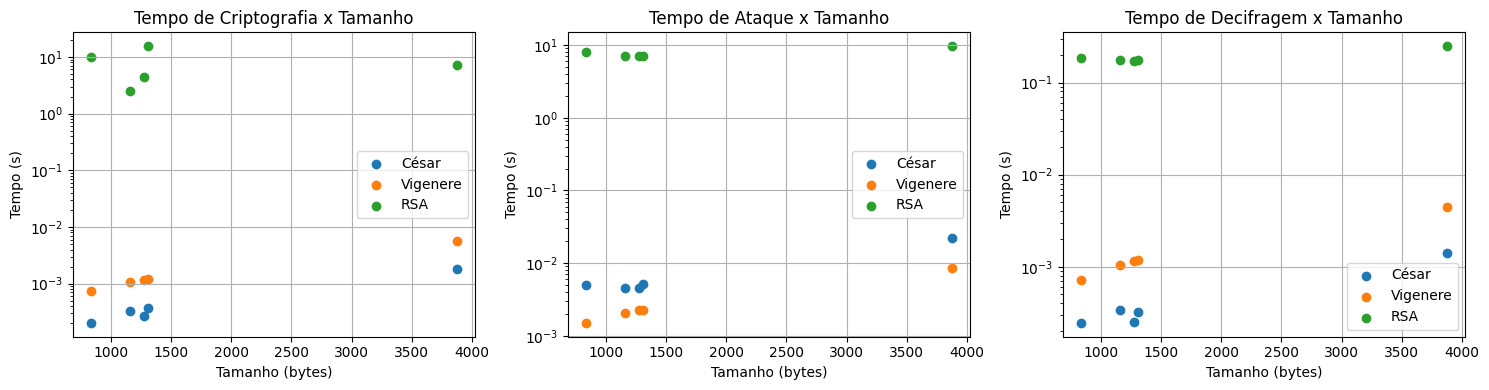

In [11]:
def plot_tempos(comparacao):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    metricas = ["tempo_cifra", "tempo_ataque", "tempo_decifra"]
    titulos = ["Tempo de Criptografia", "Tempo de Ataque", "Tempo de Decifragem"]
    
    for ax, metrica, titulo in zip(axs, metricas, titulos):
        for alg, textos_alg in comparacao.items():
            tamanhos = [dados["tamanho"] for dados in textos_alg.values()]
            tempos   = [dados[metrica]        for dados in textos_alg.values()]
            
            ax.scatter(tamanhos, tempos, marker="o", label=alg)
        
        ax.set_title(f"{titulo} x Tamanho")
        ax.set_xlabel("Tamanho (bytes)")
        ax.set_ylabel("Tempo (s)")
        ax.set_yscale("log")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()
plot_tempos(comparacao)


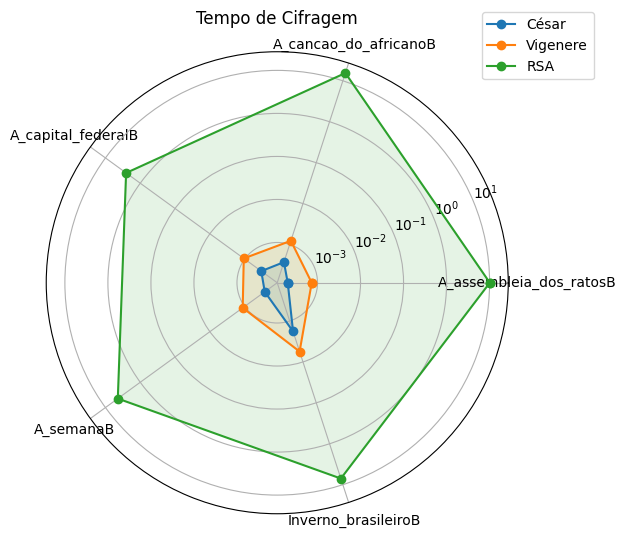

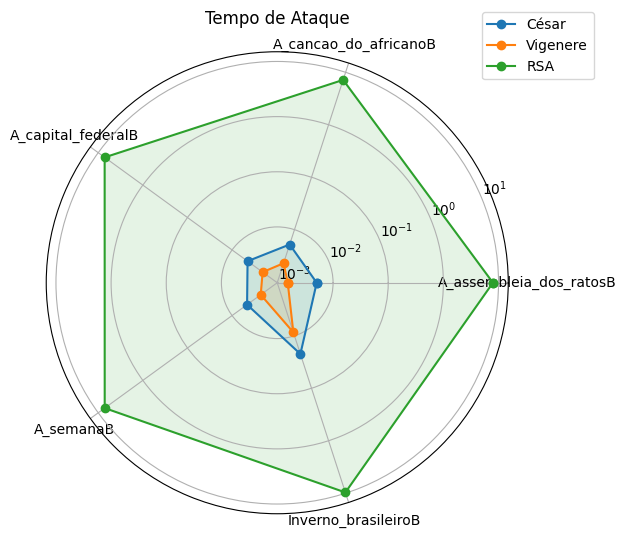

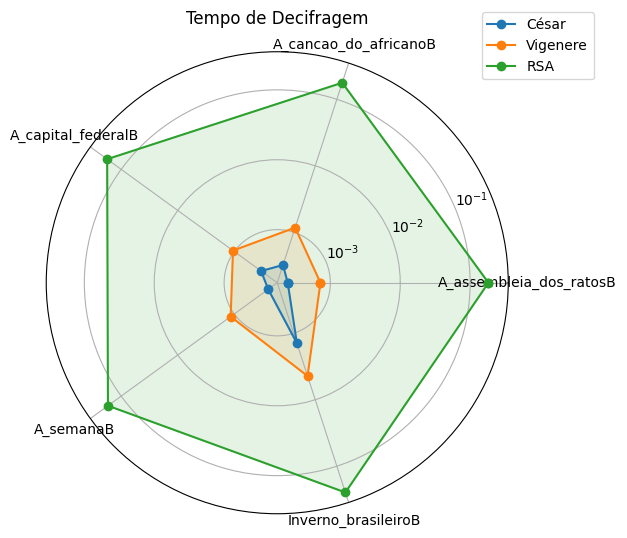

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar(comparacao):
    metricas = {
        "tempo_cifra": "Tempo de Cifragem",
        "tempo_ataque": "Tempo de Ataque",
        "tempo_decifra": "Tempo de Decifragem",
    }

    # Para cada métrica, criamos um radar separado
    for metrica, titulo in metricas.items():

        fig = plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)

        # ângulos (quantos tamanhos houver)
        tamanhos = list(next(iter(comparacao.values())).keys())
        tamanhos = sorted(tamanhos)  # garantir ordem crescente
        n = len(tamanhos)

        angulos = np.linspace(0, 2 * np.pi, n, endpoint=False).tolist()
        angulos += angulos[:1]

        # Plotar cada algoritmo com TODOS os valores
        for alg, textos_alg in comparacao.items():
            valores = [textos_alg[t][metrica] for t in tamanhos]
            valores += valores[:1]  # fechar polígono

            ax.plot(angulos, valores, marker='o', label=alg)
            ax.fill(angulos, valores, alpha=0.12)

        # Escala logarítmica no eixo radial
        ax.set_rscale("log")

        # Ajustes de rótulos e aparência
        ax.set_xticks(angulos[:-1])
        ax.set_xticklabels([f"{t}B" for t in tamanhos])
        ax.set_title(titulo, pad=20)
        ax.grid(True)
        plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
        plt.show()
plot_radar(comparacao)

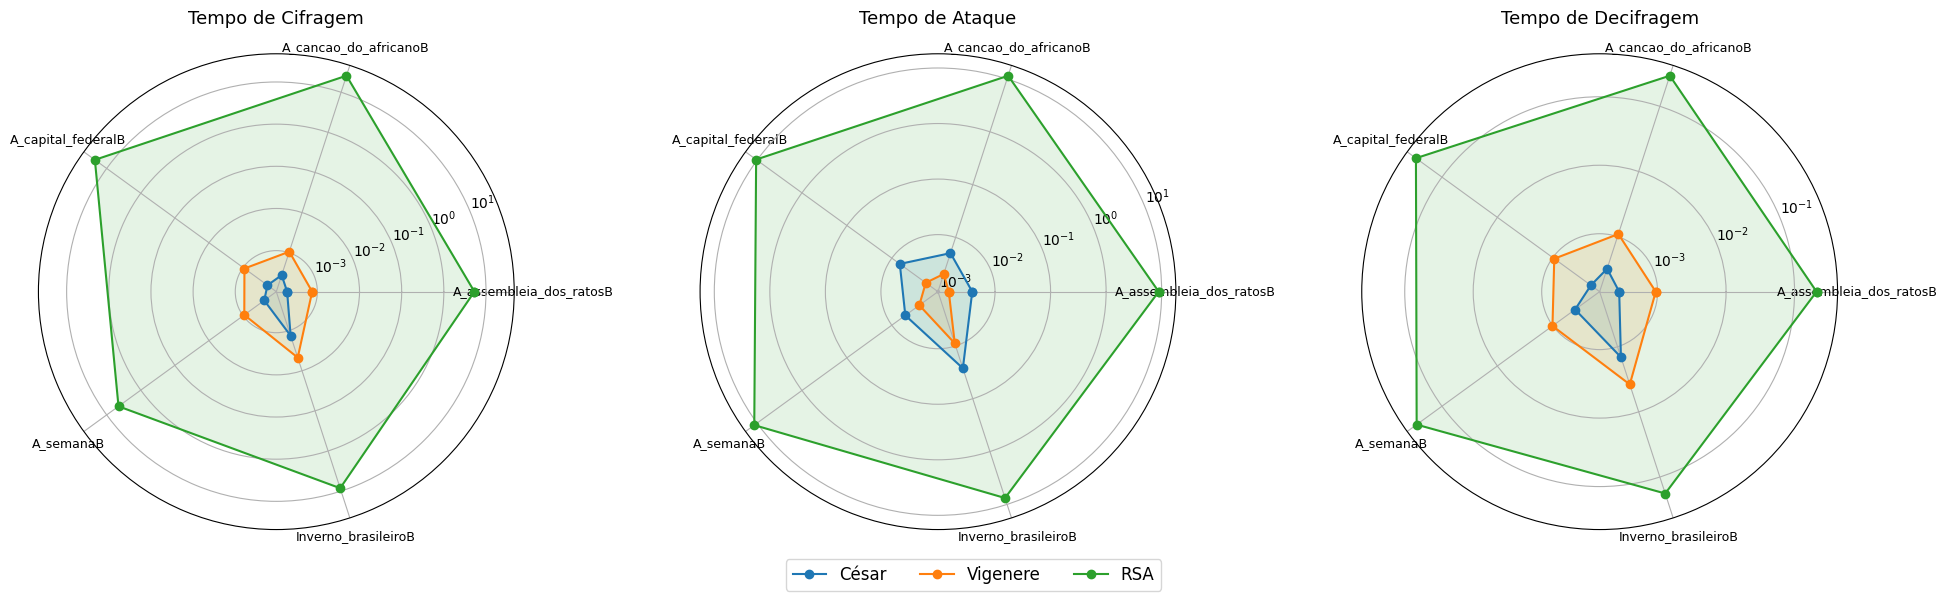

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polar_todos_lado_a_lado_rotulos_inclinados(comparacao):

    metricas = [
        ("tempo_cifra",  "Tempo de Cifragem"),
        ("tempo_ataque", "Tempo de Ataque"),
        ("tempo_decifra","Tempo de Decifragem")
    ]

    tamanhos = sorted(list(next(iter(comparacao.values())).keys()))
    n = len(tamanhos)

    angulos = np.linspace(0, 2 * np.pi, n, endpoint=False)
    angulos_full = np.concatenate([angulos, [angulos[0]]])

    fig, axs = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(polar=True))

    for ax, (metrica, titulo) in zip(axs, metricas):

        for alg, textos_alg in comparacao.items():
            valores = [textos_alg[t][metrica] for t in tamanhos]
            valores = valores + [valores[0]]

            ax.plot(angulos_full, valores, marker='o', label=alg)
            ax.fill(angulos_full, valores, alpha=0.12)

        # Escala log
        ax.set_rscale("log")

        # Rótulos angulares com inclinação
        ax.set_xticks(angulos)
        ax.set_xticklabels([f"{t}B" for t in tamanhos], fontsize=9)
        ax.tick_params(axis='x', labelrotation=0)  # <<< inclinação

        ax.set_title(titulo, pad=12, fontsize=13)

        # deixar circular e grande
        ax.set_aspect("equal", adjustable="box")
        ax.set_anchor("C")

    # Legenda abaixo da figura
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=3, fontsize=12)

    plt.tight_layout(rect=[0, 0.07, 1, 1])
    plt.show()
plot_polar_todos_lado_a_lado_rotulos_inclinados(comparacao)

*   **Análise Gráfica e de Resultados:**

    [Espaço para a análise textual das observações sobre o tempo de execução, comparando os algoritmos e o impacto do tamanho do texto.]

#### **Autocorrelação e Coocorrência**


A autocorrelação mede o grau de similaridade entre um texto e uma versão deslocada (shifted) de si mesmo. Em outras palavras, ela nos diz o quão provável é que um caractere em uma posição seja o mesmo que um caractere em uma posição n casas adiante no texto. É uma ferramenta fundamental para encontrar padrões repetitivos em dados.

Em textos cifrados (especialmente aqueles gerados por cifras de período fixo como Vigenère), a autocorrelação é usada para identificar o comprimento da chave. Se você deslocar um texto cifrado por um número de posições igual ao comprimento da chave, você tende a ver um aumento nas "coincidências" ou similaridades, pois o mesmo caractere do texto original estará sendo cifrado pela mesma letra da chave. Ao plotar a autocorrelação para diferentes deslocamentos (shifts), picos significativos podem indicar múltiplos do comprimento da chave.

A coocorrência (também conhecida como digrama ou bigrama) mede a frequência com que pares de caracteres aparecem juntos, em uma determinada ordem e distância. Por exemplo, a coocorrência de 'QU' em português é alta, enquanto 'QX' é muito baixa. Mais especificamente, uma matriz de coocorrência para shift=1 mostra a probabilidade de um caractere Y seguir um caractere X.

Em textos em linguagem natural, a coocorrência reflete a estrutura gramatical e fonética. Certos pares de letras são muito mais comuns do que outros. Um algoritmo de criptografia eficaz deve destruir esses padrões de coocorrência. Se um texto cifrado ainda exibir padrões de coocorrência semelhantes aos da linguagem natural, ele pode ser vulnerável a ataques de análise de frequência de digramas ou outros métodos estatísticos que buscam identificar pares de letras comuns na língua original.

Ambas as métricas são usadas para avaliar a "aleatoriedade" introduzida por um cifrador e para identificar vulnerabilidades em cifras que não mascaram adequadamente as propriedades estatísticas da linguagem original.

*   **Gráficos Comparativos:**

Coletando dados para: César — Inverno_brasileiro
Coletando dados para: Vigenere — Inverno_brasileiro
Coletando dados para: RSA — Inverno_brasileiro


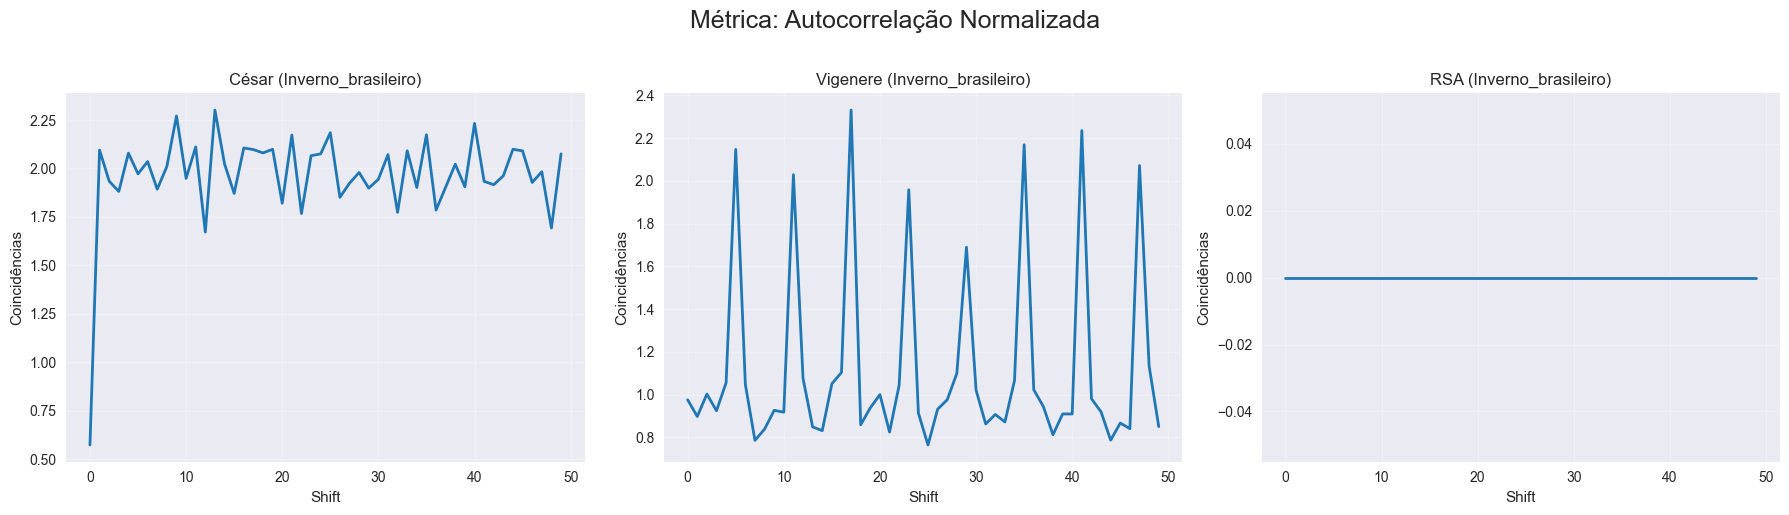

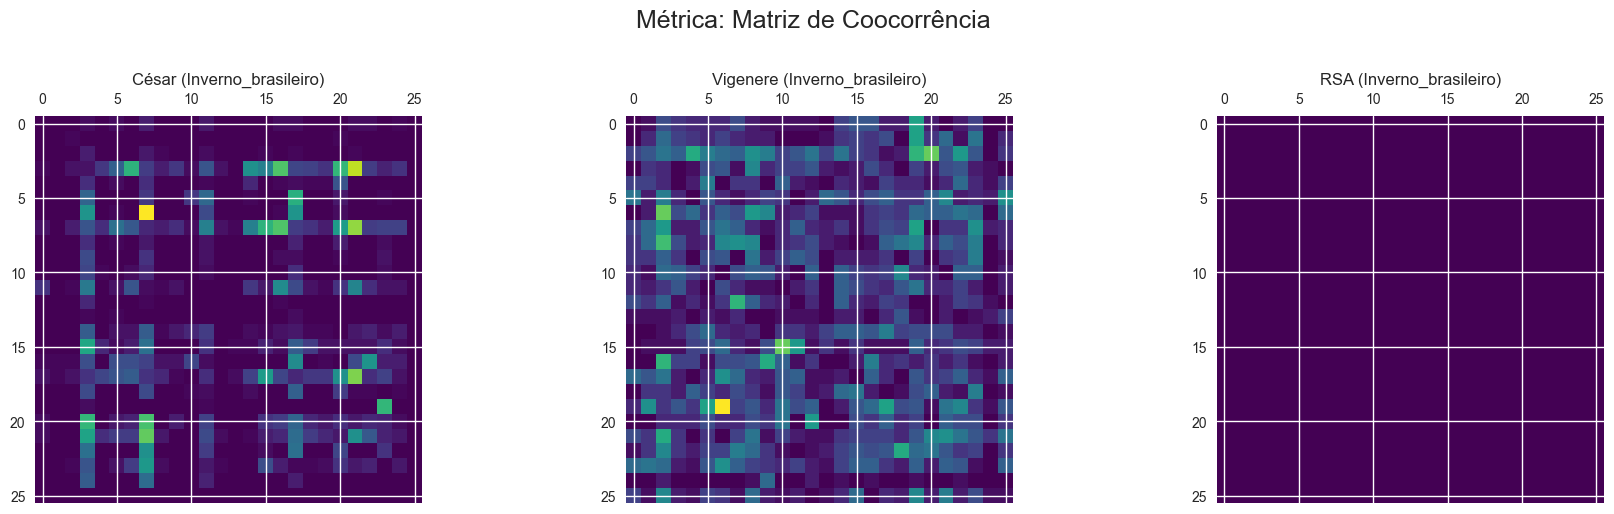

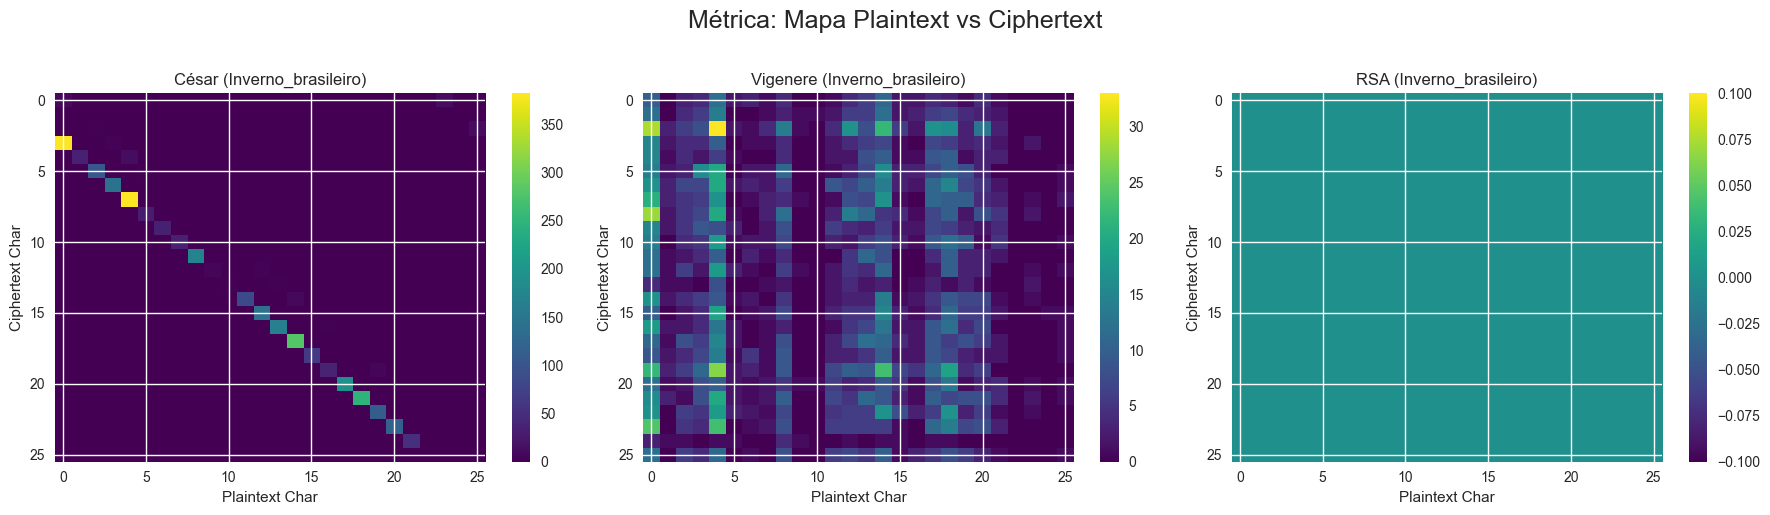

In [ ]:
import matplotlib.pyplot as plt
import math
plt.style.use("seaborn-v0_8")
def plot_autocorrelacao_normalizada(data, nome_alg, nome_txt, ax=None):
    plt.style.use("seaborn-v0_8")
    ax = ax or plt.gca()
    
    ax.plot(data, color="tab:blue", linewidth=2)
    
    # 2. Configurações de Título e Rótulos (copiadas do seu axs[0])
    ax.set_title("Autocorrelação", fontsize=13)
    ax.set_xlabel("Shift", fontsize=11)
    ax.set_ylabel("Coincidências", fontsize=11)
    
    # 3. Grade com transparência (copiada do seu axs[0])
    ax.grid(alpha=0.3)

def plot_coocorrencia(data, nome_alg, nome_txt, ax=None):
    ax = ax or plt.gca()
    ax.matshow(data, cmap='viridis')
    ax.set_title("Matriz (Heatmap)", fontsize=10)

def plot_matriz_original_vs_cifrada(data, nome_alg, nome_txt, ax=None):
    ax = ax or plt.gca()
    
    data_np = np.array(data)

    if data_np.ndim == 2:
        cax = ax.imshow(data_np, cmap='viridis', aspect='auto')
        
        plt.colorbar(cax, ax=ax)
        
        ax.set_title("Mapa 2D (Heatmap)", fontsize=10)
        ax.set_xlabel("Plaintext Char")
        ax.set_ylabel("Ciphertext Char")
        
    elif data_np.ndim == 1:
        ax.scatter(range(len(data_np)), data_np, s=5)
        
        ax.set_title("Mapa 1D (Dispersão)", fontsize=10)
        ax.set_xlabel("Plaintext Char Index")
        ax.set_ylabel("Ciphertext Char Index (Valor)")
        
    else:
        # Erro se o formato for inesperado
        ax.text(0.5, 0.5, 'ERRO: Dados com dimensão inesperada.', 
                transform=ax.transAxes, ha='center', color='red')
        ax.axis('off')
        print(f"Aviso: Dados de mapa_original_cifrada para {nome_alg} não são 1D nem 2D.")

def coletar_metricas(comparacao):
    """
    Itera sobre os algoritmos e coleta os dados das métricas
    do PRIMEIRO livro encontrado para cada um, agrupando por tipo de métrica.
    """
    metricas_agrupadas = {
        "autocorrelacao_normalizada": [],
        "coocorrencia": [],
        "mapa_original_cifrada": []
    }

    for nome_alg, textos in comparacao.items():
        
        # Selecionar Apenas o Primeiro Texto (Livro)
        try:
            nome_txt, info = next(iter(textos.items()))
        except StopIteration:
            print(f"Aviso: Nenhuma informação de texto encontrada para o algoritmo: {nome_alg}")
            continue

        print(f"Coletando dados para: {nome_alg} — {nome_txt}")
        
        # Coletar e Agrupar Dados
        
        # 1. Autocorrelação
        if "autocorrelacao_normalizada" in info:
            metricas_agrupadas["autocorrelacao_normalizada"].append({
                "alg": nome_alg, "txt": nome_txt, "data": info["autocorrelacao_normalizada"]
            })

        # 2. Coocorrência
        if "coocorrencia" in info:
            metricas_agrupadas["coocorrencia"].append({
                "alg": nome_alg, "txt": nome_txt, "data": info["coocorrencia"]
            })

        # 3. Mapa plaintext -> ciphertext
        if "mapa_original_cifrada" in info:
            metricas_agrupadas["mapa_original_cifrada"].append({
                "alg": nome_alg, "txt": nome_txt, "data": info["mapa_original_cifrada"]
            })
        
    return metricas_agrupadas


def plotar_em_grid(dados_metricos, titulo_metrica, funcao_plotagem_especifica):
    """Cria uma figura com subplots, plotando uma métrica por algoritmo."""
    num_algoritmos = len(dados_metricos)
    if num_algoritmos == 0:
        return

    cols = min(4, num_algoritmos) 
    rows = math.ceil(num_algoritmos / cols) 

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
    fig.suptitle(f"Métrica: {titulo_metrica}", fontsize=18, y=1.02)
    
    if rows == 1 and cols == 1:
        axes_list = [axes]
    else:
        axes_list = axes.flatten() 

    for i, item in enumerate(dados_metricos):
        ax = axes_list[i]
        
        funcao_plotagem_especifica(item["data"], item["alg"], item["txt"], ax=ax)
        
        ax.set_title(f"{item['alg']} ({item['txt']})", fontsize=12)
        
    for j in range(num_algoritmos, len(axes_list)):
        fig.delaxes(axes_list[j])

    plt.tight_layout()
    plt.show()

def plotar_metricas_agrupadas(comparacao):
    """
    Coleta os dados e os envia para a plotagem em grid,
    organizando os algoritmos lado a lado por métrica.
    """
    metricas_agrupadas = coletar_metricas(comparacao)
    
    plotar_em_grid(
        metricas_agrupadas["autocorrelacao_normalizada"],
        "Autocorrelação Normalizada",
        plot_autocorrelacao_normalizada 
    )
    
    # --- Coocorrência ---
    plotar_em_grid(
        metricas_agrupadas["coocorrencia"],
        "Matriz de Coocorrência",
        plot_coocorrencia 
    )
    
    # --- Mapa plaintext → ciphertext ---
    plotar_em_grid(
        metricas_agrupadas["mapa_original_cifrada"],
        "Mapa Plaintext vs Ciphertext",
        plot_matriz_original_vs_cifrada 
    )
plotar_metricas_agrupadas(comparacao)

#### **Índice de Coincidência (IC)**

O Índice de Coincidência é uma ferramenta estatística utilizada para medir a probabilidade de que dois caracteres escolhidos aleatoriamente de um texto sejam iguais. Para textos em linguagem natural, o IC é relativamente alto. Após a criptografia, espera-se que o IC de um texto cifrado seja significativamente menor e próximo ao de um texto aleatório, indicando que a estrutura da linguagem original foi mascarada.  Se o IC do texto cifrado ainda for alto, isso sugere que o algoritmo não randomizou suficientemente o texto e pode ser vulnerável a ataques de análise de frequência.

*   **Gráfico Comparativo:**

In [1]:
def plot_ic(comparacao):
    algs = []
    valores = []

    for alg, textos in comparacao.items():
        # média do IC para diferentes textos
        media_ic = sum(t["IC"] for t in textos.values()) / len(textos)
        algs.append(alg)
        valores.append(media_ic)

    plt.figure(figsize=(7,5))
    plt.bar(algs, valores)
    plt.title("Índice de Coincidência Médio")
    plt.xlabel("Algoritmo")
    plt.ylabel("IC")
    plt.show()

    
plot_ic(comparacao)


NameError: name 'comparacao' is not defined

bla bla

#### **Entropia**

A entropia quantifica a aleatoriedade e a imprevisibilidade. Um bom algoritmo criptográfico visa maximizar a entropia do texto cifrado.
Um algoritmo de criptografia robusto deve pegar um texto com baixa entropia e alto IC (o plaintext) e transformá-lo em um ciphertext que tenha alta entropia e baixo IC. Idealmente, o IC do texto cifrado deve ser próximo ao de um texto completamente aleatório (que é ~0.038 para um alfabeto de 26 letras), e sua entropia deve ser alta, indicando que as propriedades estatísticas da linguagem original foram mascaradas.

*   **Gráfico Comparativo:**

In [2]:
import matplotlib.pyplot as plt
# É bom manter o estilo seaborn-v0_8 para consistência visual
plt.style.use("seaborn-v0_8") 

def plot_ic_e_entropia_lado_a_lado(comparacao):
    # Dicionários para armazenar as médias
    medias_ic = {}
    medias_entropia = {}
    
    # 1. Processamento dos Dados
    for alg, textos in comparacao.items():
        
        # Cálculo da Média do IC
        media_ic = sum(t["IC"] for t in textos.values()) / len(textos)
        medias_ic[alg] = media_ic
        
        # Cálculo da Média da Entropia
        media_entropia = sum(t["entropia"] for t in textos.values()) / len(textos)
        medias_entropia[alg] = media_entropia
        
    algs = list(medias_ic.keys()) # Lista de nomes dos algoritmos

    # 2. Criação da Figura com 1 linha e 2 colunas de subplots
    # Aumentamos o figsize para acomodar os dois gráficos horizontalmente
    fig, axs = plt.subplots(1, 2, figsize=(14, 5)) 

    # --- GRÁFICO 1: ÍNDICE DE COINCIDÊNCIA ---
    
    # Plota no primeiro eixo (coluna 0)
    axs[0].bar(algs, medias_ic.values())
    axs[0].set_title("Índice de Coincidência Médio", fontsize=14)
    axs[0].set_xlabel("Algoritmo", fontsize=12)
    axs[0].set_ylabel("IC", fontsize=12)
    axs[0].grid(axis='y', alpha=0.3) # Adiciona grade horizontal leve para leitura

    # --- GRÁFICO 2: ENTROPIA ---
    
    # Plota no segundo eixo (coluna 1)
    axs[1].bar(algs, medias_entropia.values(), color='tab:orange') # Usando outra cor para diferenciação
    axs[1].set_title("Entropia Média", fontsize=14)
    axs[1].set_xlabel("Algoritmo", fontsize=12)
    axs[1].set_ylabel("Entropia (bits)", fontsize=12)
    axs[1].grid(axis='y', alpha=0.3) # Adiciona grade horizontal leve
    
    # Ajusta o espaçamento entre os subplots para evitar sobreposição
    plt.tight_layout()
    
    # Exibe a figura combinada
    plt.show()


plot_ic_e_entropia_lado_a_lado(comparacao)

NameError: name 'comparacao' is not defined

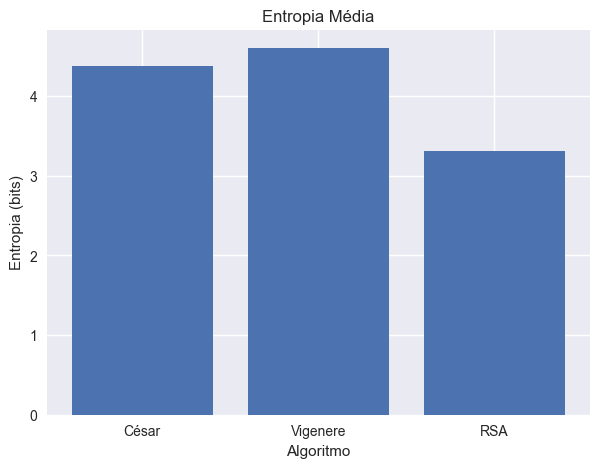

In [ ]:
def plot_entropia(comparacao):
    algs = []
    valores = []

    for alg, textos in comparacao.items():
        media = sum(t["entropia"] for t in textos.values()) / len(textos)
        algs.append(alg)
        valores.append(media)

    plt.figure(figsize=(7,5))
    plt.bar(algs, valores)
    plt.title("Entropia Média")
    plt.xlabel("Algoritmo")
    plt.ylabel("Entropia (bits)")
    plt.show()
plot_entropia(comparacao)


#### **Expansão de Tamanho**

Esta métrica avalia o quanto o tamanho do texto cifrado se expande em relação ao texto original. Alguns algoritmos criptográficos adicionam bytes extras (por exemplo, devido ao preenchimento - padding) ao texto original, resultando em um texto cifrado maior. A expansão excessiva pode ser um fator a considerar em aplicações com restrições de armazenamento ou largura de banda.

*   **Gráficos Comparativos:**

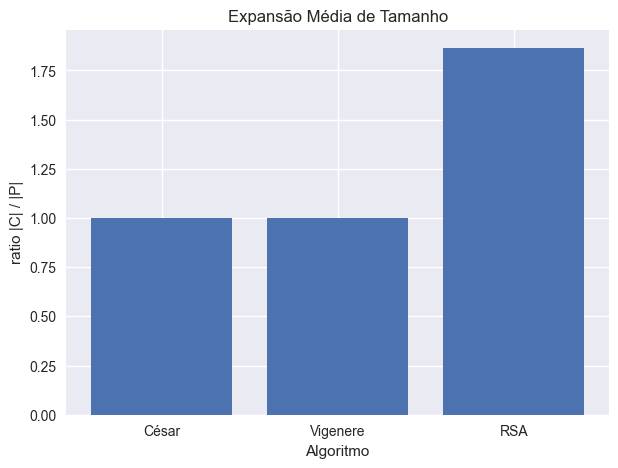

In [84]:
def plot_expansao(comparacao):
    algs = []
    valores = []

    for alg, textos in comparacao.items():
        media = sum(t["expansao"] for t in textos.values()) / len(textos)
        algs.append(alg)
        valores.append(media)

    plt.figure(figsize=(7,5))
    plt.bar(algs, valores)
    plt.title("Expansão Média de Tamanho")
    plt.xlabel("Algoritmo")
    plt.ylabel("ratio |C| / |P|")
    plt.show()

plot_expansao(comparacao)

bla bla

#### **Efeito Avalanche**

O efeito avalanche mede a propriedade de um algoritmo criptográfico onde uma pequena alteração no texto de entrada (ou na chave) resulta em uma grande alteração no texto de saída. Um bom efeito avalanche é essencial para a segurança, pois garante que mesmo pequenas modificações sejam propagadas extensivamente, dificultando a inferência de informações sobre o texto original ou a chave a partir do texto cifrado.

*   **Gráfico Comparativo:**

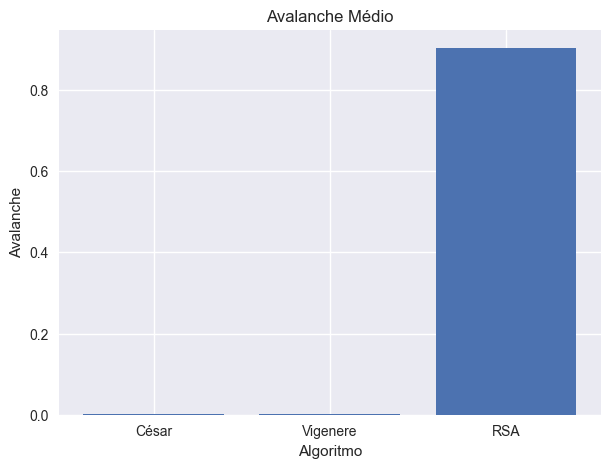

In [85]:
def plot_avalanche(comparacao):
    algs = []
    valores = []

    for alg, textos in comparacao.items():
        media = sum(t["avalanche"] for t in textos.values()) / len(textos)
        algs.append(alg)
        valores.append(media)

    plt.figure(figsize=(7,5))
    plt.bar(algs, valores)
    plt.title("Avalanche Médio")
    plt.xlabel("Algoritmo")
    plt.ylabel("Avalanche")
    plt.show()

plot_avalanche(comparacao)

#### **Tabela separada por texto e algoritmo**

In [86]:
def tabela_metricas_pivot(comparacao):
    df = tabela_metricas(comparacao)
    return df.pivot(index="Texto", columns="Algoritmo")
tabela_metricas_pivot(comparacao)

IC                 \
Algoritmo                                              César  RSA  Vigenere   
Texto                                                                         
A_assembleia_dos_ratos                              0.042424  0.0  0.026311   
A_canção_do_africano                                0.041480  0.0  0.025493   
A_capital_federal                                   0.043855  0.0  0.026673   
A_semana                                            0.038384  0.0  0.024252   
A_sobriedade_do_inverno_brasileiro                  0.043807  0.0  0.026720   
Cancao_do_exilio                                    0.040812  0.0  0.025663   
Conto_macabro                                       0.040612  0.0  0.025392   
Frankenstein                                        0.046150  0.0  0.028129   
Lingua_do_p                                         0.056831  0.0  0.033280   
Memórias_póstumas_de_brás_cubas (machado de assis)  0.044481  0.0  0.027204   
Modinha                                             0.036199  0.0  0.024028   
O_homem_e_o_cavalo                                  0.041133  0.0  0.025739   
O_livro_e_a_leitura                                 0.044889  0.0  0.026457   
Os_sertoes                                          0.042182  0.0  0.027095   
Profissao_de_fe                                     0.038421  0.0  0.024052   
Quincas_borba                                       0.041986  0.0  0.024798   
Triste_fim_de_policarpo_quaresma                    0.041998  0.0  0.025836   
Versos_intimos                                      0.041897  0.0  0.029921   
Viagens_na_minha_terra                              0.042683  0.0  0.028772   
Vidas_secas                                         0.046614  0.0  0.025505   

                                                    Entropia            \
Algoritmo                                              César       RSA   
Texto                                                                    
A_assembleia_dos_ratos                              4.400399  3.320901   
A_canção_do_africano                                4.532794  3.318406   
A_capital_federal                                   4.315065  3.315822   
A_semana                                            4.349034  3.318603   
A_sobriedade_do_inverno_brasileiro                  4.349841  3.314798   
Cancao_do_exilio                                    4.539377  3.315256   
Conto_macabro                                       4.411465  3.319649   
Frankenstein                                        4.322123  3.304302   
Lingua_do_p                                         4.182880  3.318465   
Memórias_póstumas_de_brás_cubas (machado de assis)  4.208742  3.313152   
Modinha                                             4.396393  3.317397   
O_homem_e_o_cavalo                                  4.351182  3.314606   
O_livro_e_a_leitura                                 4.272060  3.318700   
Os_sertoes                                          4.361245  3.316939   
Profissao_de_fe                                     4.428942  3.317153   
Quincas_borba                                       4.286589  3.312608   
Triste_fim_de_policarpo_quaresma                    4.619640  3.318916   
Versos_intimos                                      4.551397  3.317253   
Viagens_na_minha_terra                              4.351524  3.315409   
Vidas_secas                                         4.300011  3.316590   

                                                             Avalanche  \
Algoritmo                                           Vigenere     César   
Texto                                                                    
A_assembleia_dos_ratos                              4.659700  0.001272   
A_canção_do_africano                                4.666543  0.000815   
A_capital_federal                                   4.519979  0.000894   
A_semana                                            4.568734  0.000814   
A_sobriedade_do_inv

## **Visualização: Textos Cifrados e Decifrados**

### **Cifra de César**

In [ ]:
caminho_texto = "examples/textos_base/Inverno_brasileiro.txt"
chave_secreta = 5 
alfabeto_base = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

with open(caminho_texto, encoding="utf-8") as f:
    texto_original = f.read()

texto_claro = "".join(filter(str.isalpha, texto_original)).upper()

texto_cifrado = cesar.cifrar(texto_claro, chave_secreta, alfabeto=alfabeto_base)
resultados_ataque = cesar.ataque_cesar(texto_cifrado, alfabeto=alfabeto_base)

# A chave correta para DEcifrar é: 26 - chave_secreta
chave_de_decifragem_correta = len(alfabeto_base) - chave_secreta
texto_recuperado = resultados_ataque[chave_de_decifragem_correta]

print("Texto Cifrado (Amostra):")
print(texto_cifrado, "\n")

print(f"Chave de Decifragem Correta Encontrada (Shift): {chave_de_decifragem_correta}\n")

print("Texto Recuperado pelo Ataque (Completo):")
print(texto_recuperado, "\n")

print("Ataque concluído!")

### **Cifra de Vigénere**

In [ ]:
vigenere = VigenereCifra()

In [ ]:
texto_original = open("examples/cesar_x_vigenere/longo.txt", encoding="utf-8").read()
chave_encr = "cripto"
texto_cifrado = vigenere.encriptar_decriptar(texto_original, chave_encr, "cifrar")
print(texto_cifrado)

C TICVOQ UW PYFKTICH (OPKWCBC HIMSXFKTW SX QCJBGH ONMMH)

EO PR CBBRC JMCSONR,
ATGHCUW CT SUKZTBHC JIAT,
XWEBD TC DIIHXWTF, VD VVCF,
MCMCC F MHVFCMW D LSW TICMC,
G RW RTBVRZ RHFTVU-AAS GD XGTBVF
APNRCUMH WC UVC IHFTRW...

SX IO CISH, IOR VTZFC VARKOXR
WH HZJFA CH TKCPD VFCMI,
FNS VVU CH QQCW P XADRTPK...
S C DMXT JQQ TP KSUGWCWS
CF KPGHQ, V W UBZJZVWH SUTWCWS,
VRTKXN RII CTC Q VARNHCI!

UXGVC KMGKO G CI QXA NFVVX,
RCJ JPGRCJ LT HBFV W HHZ XVU;
TLHC KMGKO G DIXL PQEQIT,
ACJ I DNHTR MJ JIGIW QXA!

Q JWA YOB CI INRQ VU UHUQ,
WIO XA DIIHT HQUI P TFGZI;
CBBILMB LODV KDFC G SMAH
JGI LT MOTUM P IORR-KTBO!

CHCTEOU KMGKOU KID ZFCELTL,
HCF KDFDTZLPL QQDW D FOT,
TWB LICJ XDNQCJ XPEAGZZPL
RCF DDGHCUM SX DGEAPK...

ZC KWSHG XZDTF TGCQOXG,
VFLDL RCEKPF BQ KMGKSKIW;
P ZSPKM AT BCF AT OSPUM
RHAQ RYJB, GQ GWG WWPYMXKC.

Q VARKOXF KPECW R NPEO,
RFZFNS PR CBBRC JIAT
C HFOD XGVRDP T ORROPK;
S C VARKOXR IRTPQL ATN QCEBD,
IFC EID TQQILPK QQD W EKOPKW
D LSW WQAAWPYW P LCPYIG!

H SUTZPOC GEBPH TQZ LTBHCI-AT,

In [ ]:
tamanho_chave = vigenere.tamanho_chave(texto_cifrado)

Tamanhos de chave possíveis (ordenados por frequência):
Tamanho: 6 -- Quantidade: 71
Tamanho: 4 -- Quantidade: 35
Tamanho: 12 -- Quantidade: 32
Tamanho: 9 -- Quantidade: 22
Tamanho: 18 -- Quantidade: 19
Tamanho: 8 -- Quantidade: 17
Tamanho: 5 -- Quantidade: 13
Tamanho: 15 -- Quantidade: 12
Tamanho: 10 -- Quantidade: 11
Tamanho: 7 -- Quantidade: 10
Tamanho: 11 -- Quantidade: 8
Tamanho: 14 -- Quantidade: 8
Tamanho: 16 -- Quantidade: 8
Tamanho: 19 -- Quantidade: 6
Tamanho: 20 -- Quantidade: 6
Tamanho: 13 -- Quantidade: 5
Tamanho: 17 -- Quantidade: 5

Tamanho provável da chave: 6


In [ ]:
chave_encontrada = vigenere.quebra_chave(texto_cifrado,tamanho_chave, 'pt')
print(chave_encontrada)

CRIPTO


In [ ]:
texto_decriptado = vigenere.encriptar_decriptar(texto_cifrado, chave_encontrada,"decifrar")
print(texto_decriptado)

A CANCAO DO AFRICANO (ANTONIO FREDERICO DE CASTRO ALVES)

LA NA UMIDA SENZALA,
SENTADO NA ESTREITA SALA,
JUNTO AO BRASEIRO, NO CHAO,
ENTOA O ESCRAVO O SEU CANTO,
E AO CANTAR CORREM-LHE EM PRANTO
SAUDADES DO SEU TORRAO...

DE UM LADO, UMA NEGRA ESCRAVA
OS OLHOS NO FILHO CRAVA,
QUE TEM NO COLO A EMBALAR...
E A MEIA VOZ LA RESPONDE
AO CANTO, E O FILHINHO ESCONDE,
TALVEZ PRA NAO O ESCUTAR!

MINHA TERRA E LA BEM LONGE,
DAS BANDAS DE ONDE O SOL VEM;
ESTA TERRA E MAIS BONITA,
MAS A OUTRA EU QUERO BEM!

O SOL FAZ LA TUDO EM FOGO,
FAZ EM BRASA TODA A AREIA;
NINGUEM SABE COMO E BELO
VER DE TARDE A PAPA-CEIA!

AQUELAS TERRAS TAO GRANDES,
TAO COMPRIDAS COMO O MAR,
COM SUAS POUCAS PALMEIRAS
DAO VONTADE DE PENSAR...

LA TODOS VIVEM FELIZES,
TODOS DANCAM NO TERREIRO;
A GENTE LA NAO SE VENDE
COMO AQUI, SO POR DINHEIRO.

O ESCRAVO CALOU A FALA,
PORQUE NA UMIDA SALA
O FOGO ESTAVA A APAGAR;
E A ESCRAVA ACABOU SEU CANTO,
PRA NAO ACORDAR COM O PRANTO
O SEU FILHINHO A SONHAR!

O ESCRAVO ENTAO FOI DEITAR-SE,

### **Criptografia RSA**

In [ ]:
rcaminho_texto = "examples/textos_base/memorias_postumas_b_c.txt"
with open(caminho_texto, encoding="utf-8") as f:
    texto_original = f.read()

m1_bytes = texto_original.encode('utf-8')
m1_int = int.from_bytes(m1_bytes, byteorder='big', signed=False)

caso = gerador_caso_relacionado_linear(
    bits=1024, texto1=texto_original, texto2=None, a=None, 
    b=None, encrypt_func=None, e_inicial=65537
)

n, e, a, b = caso["n"], caso["e"], caso["a"], caso["b"]
m1, m2 = caso["m1"], caso["m2"]
c1, c2 = caso["c1"], caso["c2"]

print("Parâmetros gerados:")
print(f"n = {n}")
print(f"e = {e}")
print(f"a = {a}")
print(f"b = {b}\n")

print("Ciphertexts:")
print("c1 =", c1)
print("c2 =", c2, "\n")

recuperado_int = ataque_franklin_reiter(
    c1=c1, c2=c2, e=e, n=n, a=a, b=b, nbytes=None
)

if recuperado_int == 0:
    bytes_length = 0
else:
    bytes_length = (recuperado_int.bit_length() + 7) // 8

recuperado_bytes = recuperado_int.to_bytes(bytes_length, byteorder='big', signed=False)
texto_recuperado = recuperado_bytes.decode('utf-8', errors='ignore')

print("Texto cifrado (c1) [apenas os primeiros 100 dígitos, pois é um número grande]:")
print(str(c1)[:100], "...\n")

print("Texto recuperado pelo ataque (completo):")
print(texto_recuperado, "\n")

print("Ataque concluído!")

### **Classificando os textos criptografados**

In [44]:
IC_LINGUA_NATURAL = 0.073  #PTBR
IC_ALEATORIO = 0.038       

def classificar_algoritmos(comparacao: dict) -> dict:
    """
    Classifica cada texto cifrado como RSA, CÉSAR ou VIGENÈRE
    com base em Expansão, Índice de Coincidência (IC) e Autocorrelação.
    """
    classificacoes = {}
    
    for nome_texto, dados_algoritmos in comparacao.items():
        
        metricas = next(iter(dados_algoritmos.values()))
        
        # Expansão Alta
        if metricas["expansao"] > 1.5:
            classificacoes[nome_texto] = "RSA"
            continue

        # César preserva a estatística da língua.
        if metricas["IC"] >= 0.06:
            classificacoes[nome_texto] = "CÉSAR"
            continue
            
        # Vigenère nivela o IC para o valor aleatório, mas introduz picos de repetição.
        if metricas["IC"] < 0.05:
            
            autocorr_array = np.array(metricas["autocorrelacao_normalizada"])
            variancia_autocorr = np.var(autocorr_array)
            
            # Se a variância é significativa, indica picos (chave repetida de Vigenère).
            if variancia_autocorr > 0.0001:
                 classificacoes[nome_texto] = "VIGENÈRE"
                 continue
            else:
                 classificacoes[nome_texto] = "VIGENÈRE (Chave Longa/Quase Aleatório)"
                 continue

        classificacoes[nome_texto] = "CLASSIFICAÇÃO INDEFINIDA"
        
    return classificacoes



def carregar_textos_especificos(lista_nomes_arquivos: list) -> dict:
    """
    Carrega o conteúdo de uma lista específica de arquivos de texto.
    
    Retorna um dicionário no formato: {nome_do_arquivo: conteudo_do_texto}
    """
    textos = {}
    
    # Define o caminho base onde seus arquivos estão localizados
    caminho_base = "examples/textos_base/" 
    
    for nome_arquivo in lista_nomes_arquivos:
        caminho_completo = os.path.join(caminho_base, nome_arquivo)
        
        try:
            with open(caminho_completo, encoding="utf-8") as f:
                # O texto é lido e armazenado no dicionário
                textos[nome_arquivo] = f.read()
        except FileNotFoundError:
            print(f"ERRO: Arquivo não encontrado: {caminho_completo}")
        except Exception as e:
            print(f"ERRO ao ler {nome_arquivo}: {e}")
            
    return textos

arquivos_para_teste = [
    "memorias_postumas_b_c.txt",
    "a_cancao_do_africano.txt",
    "Inverno_brasileiro.txt"
]

textos_selecionados = carregar_textos_especificos(arquivos_para_teste)

print("Textos carregados para análise:")
for nome in textos_selecionados:
    print(f"- {nome}: {len(textos_selecionados[nome]):,} caracteres")

Textos carregados para análise:
- memorias_postumas_b_c.txt: 621 caracteres
- a_cancao_do_africano.txt: 1,264 caracteres
- Inverno_brasileiro.txt: 3,797 caracteres
